In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error,  r2_score, confusion_matrix, precision_score, recall_score, precision_recall_curve 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder, StandardScaler

### Шаг 1. Загрузите и изучите данные

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;
молоко должно быть вкусным.

В данной работе нам требуется:

1. изучить датасет
2. сделать предобработку(избавиться от дубликатов, пустных значений)
3. провести исследовательский анализ данных.
4. провести корреляционный анализ признаков.
5. обучить модели линейной регрессии.
6. обучить модели логической регрессии.
7. сделать итоговые выводы.

In [2]:
ferma_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';', decimal = ',')
ferma_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';', decimal = ',')
cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';', decimal = ',')

Для начала откроем датасеты и разделим склеенные данные с помощью сепаратора.
Выведем первые 20 строк:

In [3]:
ferma_main.head(20)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


In [4]:
ferma_dad.head(20)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [5]:
cow_buy.head(20)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


**Вывод: Данные соответсвуют описанию и готовы к предобработке. Переименовывать столбцы не вижу смысла, pandas работает с русским языком.**

## Шаг 2. Предобработка данных

#### ferma_main

Приведем столбцы к нижнему регистру:

In [6]:
ferma_main.columns = ferma_main.columns.str.lower()
ferma_main = ferma_main.rename(columns=lambda x: x.replace(' ', '_'))
ferma_main.head(5)

,id,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


Проверяем на дубликаты:

In [7]:
ferma_main.duplicated().unique()

array([False,  True])

In [8]:
duplicates = ferma_main[ferma_main.duplicated(keep=False)]
duplicates

,id,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
626,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [9]:
ferma_main.drop_duplicates(inplace=True)
ferma_main.duplicated().unique()

array([False])

Неявные дубликаты:

В ходе исследовательского анализа были выявлены неявные дубликаты в категориальных данных.

In [10]:
ferma_main['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [11]:
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].replace('Равнинные','Равнинное')
ferma_main['тип_пастбища'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [12]:
ferma_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [13]:
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].replace('Айдиалл','Айдиал')
ferma_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

Проверяем на пропуски:

In [14]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     629 non-null    int64  
 1   удой,_кг                               629 non-null    int64  
 2   эке_(энергетическая_кормовая_единица)  629 non-null    float64
 3   сырой_протеин,_г                       629 non-null    int64  
 4   спо_(сахаро-протеиновое_соотношение)   629 non-null    float64
 5   порода                                 629 non-null    object 
 6   тип_пастбища                           629 non-null    object 
 7   порода_папы_быка                       629 non-null    object 
 8   жирность,%                             629 non-null    float64
 9   белок,%                                629 non-null    float64
 10  вкус_молока                            629 non-null    object 
 11  возрас

Считаю нужно удалить столбец id. В датасете итак формируется свой id, а после удаления мной дубликатов, они будут в неправильном порядке.

In [15]:
ferma_main = ferma_main.drop(columns='id')
ferma_main.head(5)

,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
0,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


Преобразование данных в нужные типы:

In [16]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   удой,_кг                               629 non-null    int64  
 1   эке_(энергетическая_кормовая_единица)  629 non-null    float64
 2   сырой_протеин,_г                       629 non-null    int64  
 3   спо_(сахаро-протеиновое_соотношение)   629 non-null    float64
 4   порода                                 629 non-null    object 
 5   тип_пастбища                           629 non-null    object 
 6   порода_папы_быка                       629 non-null    object 
 7   жирность,%                             629 non-null    float64
 8   белок,%                                629 non-null    float64
 9   вкус_молока                            629 non-null    object 
 10  возраст                                629 non-null    object 
dtypes: flo

#### ferma_dad

Приведем столбцы к нижнему регистру:

In [17]:
ferma_dad.columns = ferma_dad.columns.str.lower()
ferma_dad = ferma_dad.rename(columns=lambda x: x.replace(' ', '_'))
ferma_dad.head(5)

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Проверяем на дубликаты:

In [18]:
ferma_dad.duplicated().unique()

array([False])

Проверяем на пропуски:

In [19]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Аналогично как в прошлом датасете удалю id:

In [20]:
ferma_dad = ferma_dad.drop(columns='id')
ferma_dad.head(5)

,имя_папы
0,Буйный
1,Соловчик
2,Барин
3,Буйный
4,Барин


#### cow_buy

Приведем столбцы к нижнему регистру:

In [21]:
cow_buy.columns = cow_buy.columns.str.lower()
cow_buy = cow_buy.rename(columns=lambda x: x.replace(' ', '_'))
cow_buy.head(5)

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Проверяем на дубликаты:

In [22]:
cow_buy.duplicated().unique()

array([False,  True])

In [23]:
duplicates2 = cow_buy[cow_buy.duplicated(keep=False)]
duplicates2

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [24]:
cow_buy.drop_duplicates(inplace=True)
cow_buy.duplicated().unique()

array([False])

Проверяем на пропуски:

In [25]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 18
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   порода                   16 non-null     object 
 1   тип_пастбища             16 non-null     object 
 2   порода_папы_быка         16 non-null     object 
 3   имя_папы                 16 non-null     object 
 4   текущая_жирность,%       16 non-null     float64
 5   текущий_уровень_белок,%  16 non-null     float64
 6   возраст                  16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


**Вывод: Данные обработанны от пропусков и дубликатов. В некоторых датасетах удалены ненужные столбцы. Так же данные приведены к нужным типам.**

## Шаг 3. Исследовательский анализ данных

Построю гистограммы всех признаков, чтобы наглядно на графиках рассмотреть их:

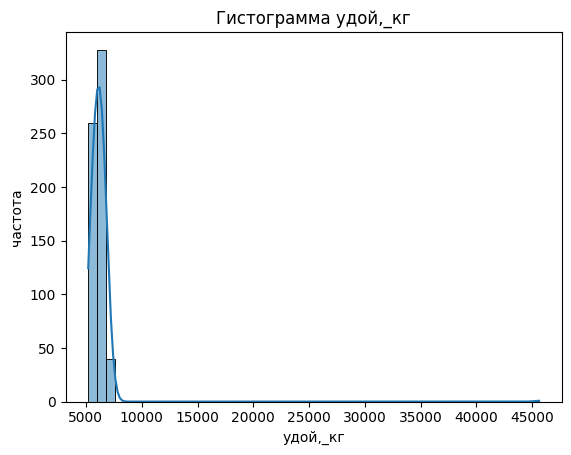

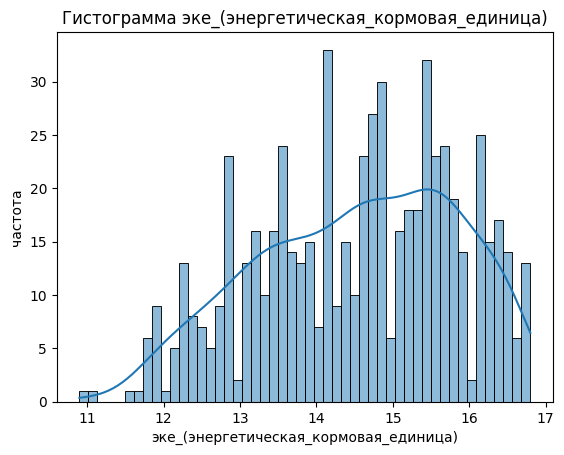

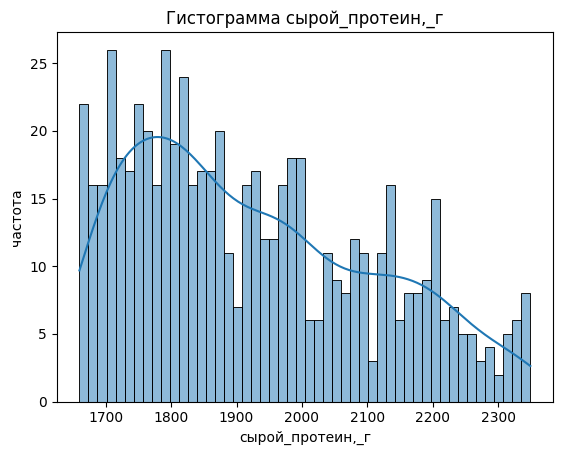

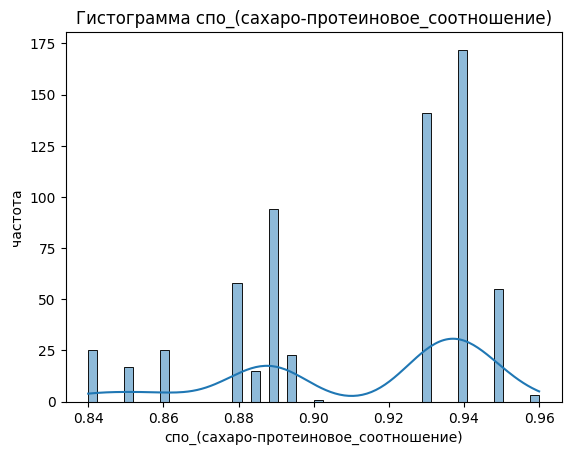

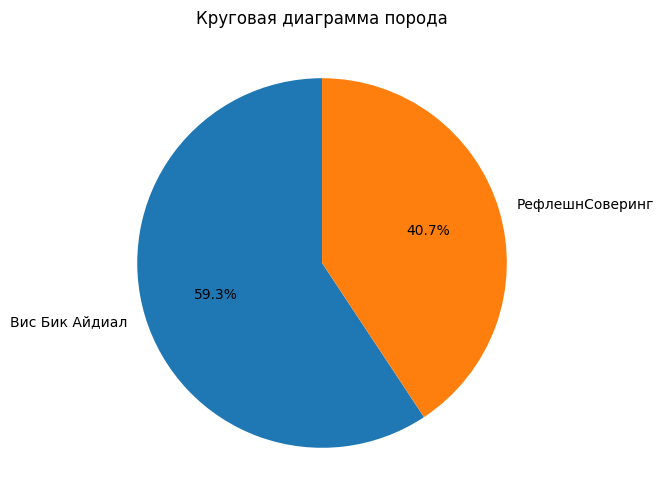

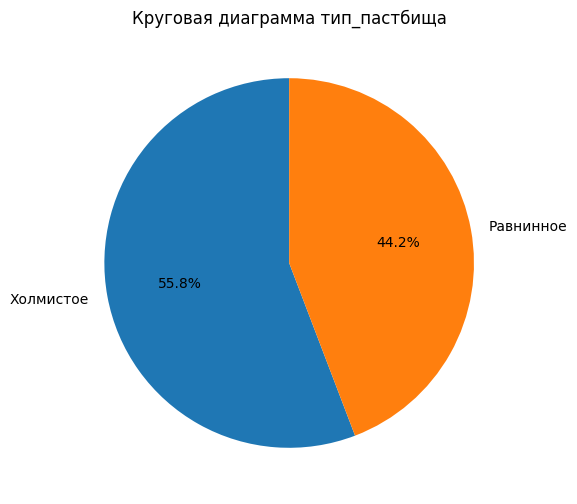

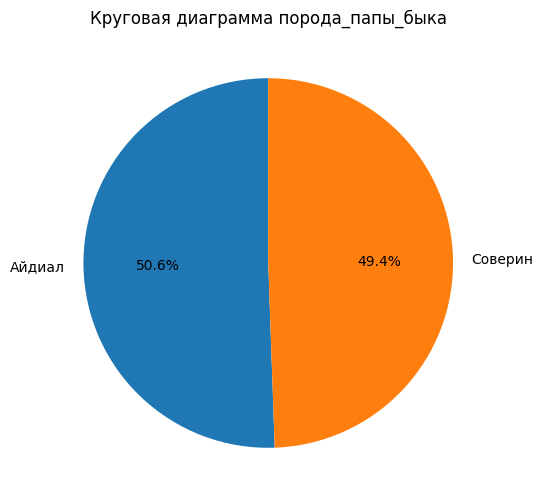

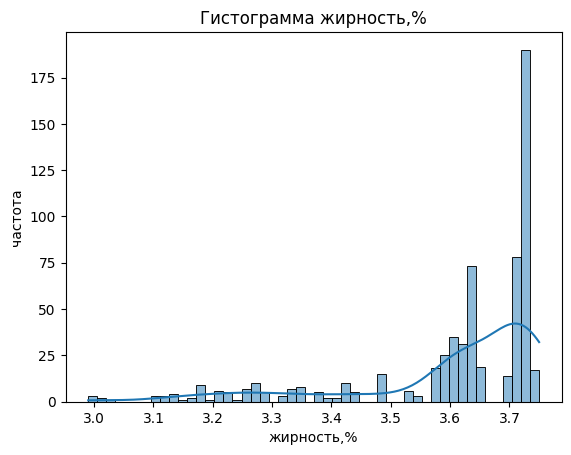

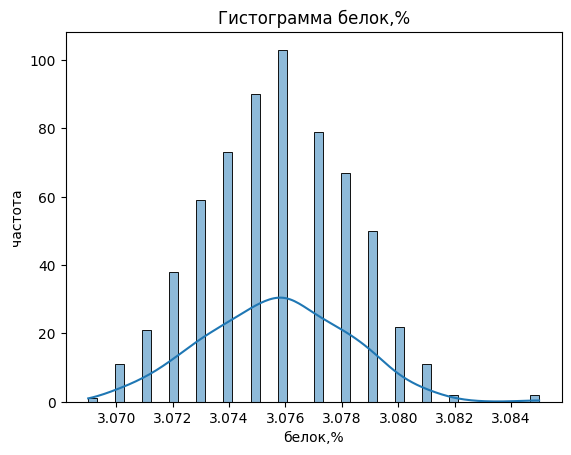

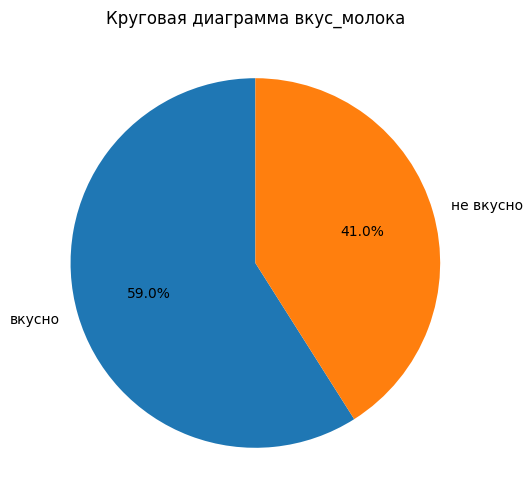

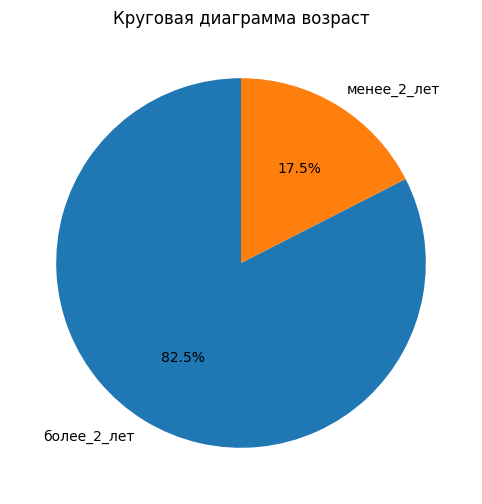

In [26]:
def plot_builder(df):
    for column in df:
        if df[column].dtype == 'int64' or df[column].dtype == 'float64':
            plt.figure()
            sns.histplot(data=df[column], bins=50, kde=True)
            plt.title(f'Гистограмма {column}')
            plt.xlabel(column)
            plt.ylabel('частота')
            plt.show()
        else:
            plt.figure(figsize=(10, 6))
            value_counts = df[column].value_counts()
            plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%',startangle=90)
            plt.title(f'Круговая диаграмма {column}')
            plt.show()

plot_builder(ferma_main);

**Произвели отображение данных на гистограммах. Некоторые графики показали выбросы, которые нужно исправить.**

In [27]:
ferma_main['удой,_кг'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой,_кг, dtype: float64

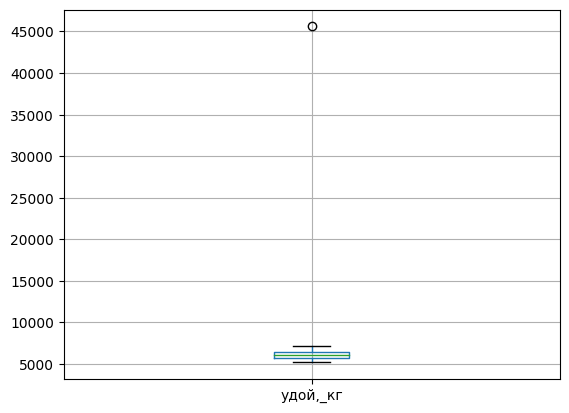

In [28]:
ferma_main.boxplot('удой,_кг');

Явно заметен выброс в районе 45000кг. Лучше будет от него избавиться, чтобы не влиял на обучение.

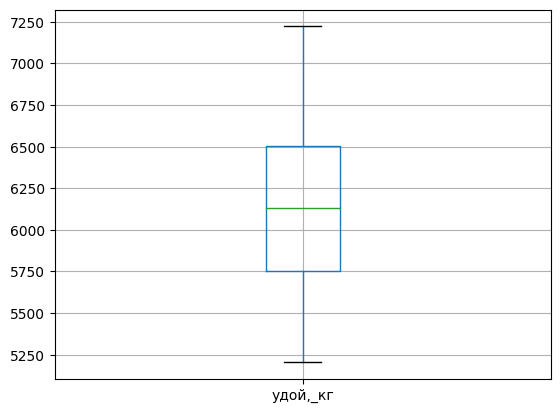

In [29]:
ferma_main = ferma_main.query('`удой,_кг` <= 10000')
ferma_main.boxplot('удой,_кг');

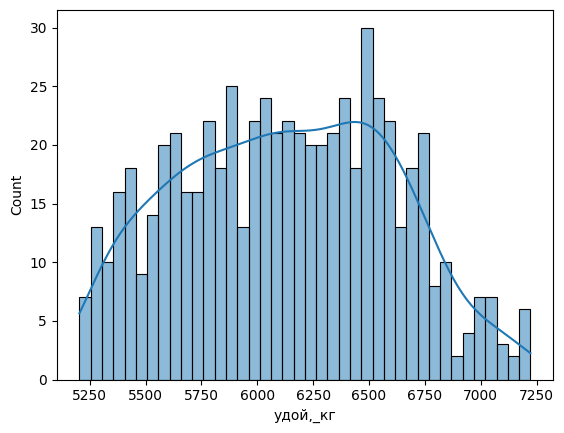

In [30]:
sns.histplot(data=ferma_main['удой,_кг'], bins=40, kde=True);  

Данные очишены от аномалии.

In [31]:
ferma_main.describe()

,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),"жирность,%","белок,%"
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


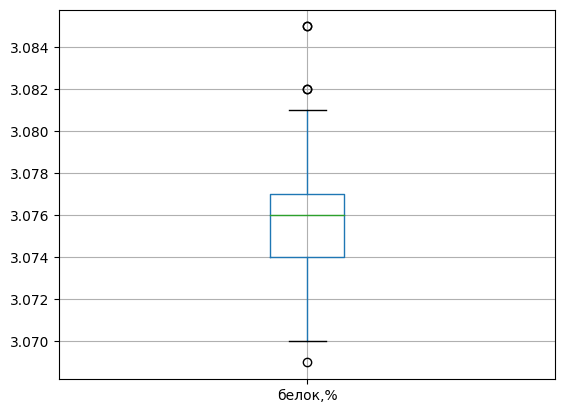

In [32]:
ferma_main.boxplot('белок,%');

In [33]:
ferma_main.shape[0]

628

Остальные данные не сильно будут влият на обучение модели, поэтому не будем их исправлять.

Построим круговую диаграмму для наглядности распределения имен:

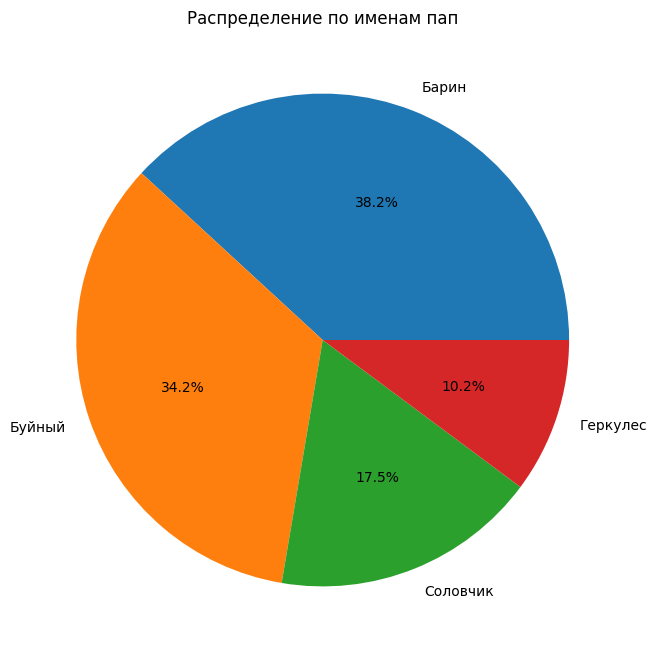

In [34]:
plt.figure(figsize=(8, 8))
ferma_dad['имя_папы'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Распределение по именам пап')
plt.ylabel('') 
plt.show()

Данные выглядят нормально, удалять ничего не нужно.

Построим гистограммы для отображения признаков:

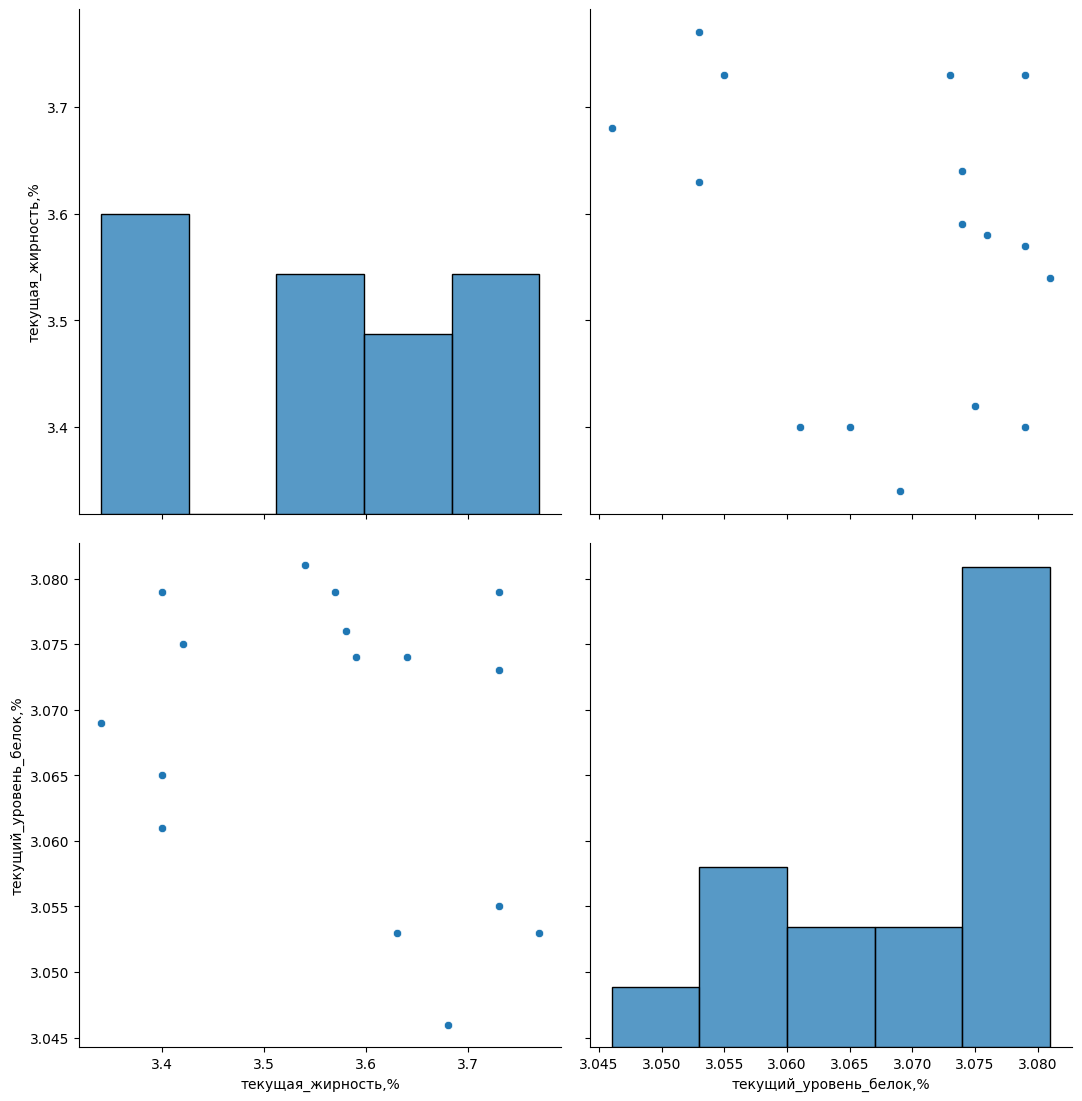

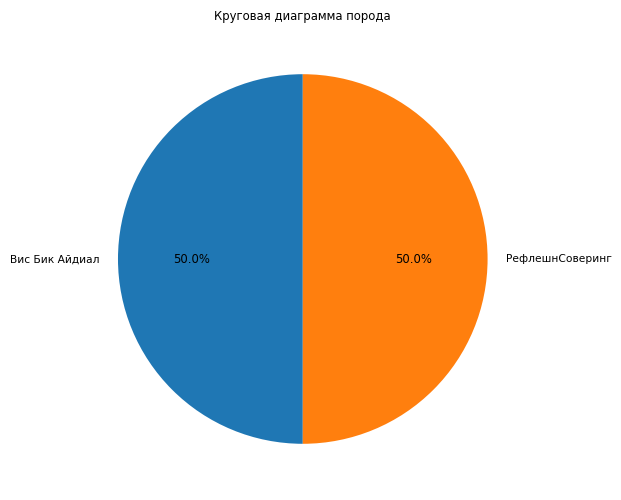

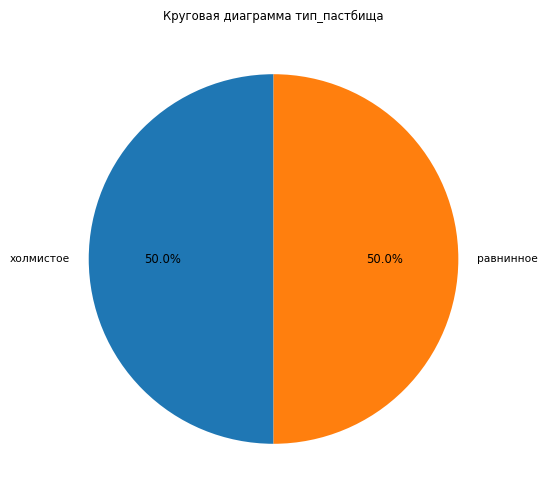

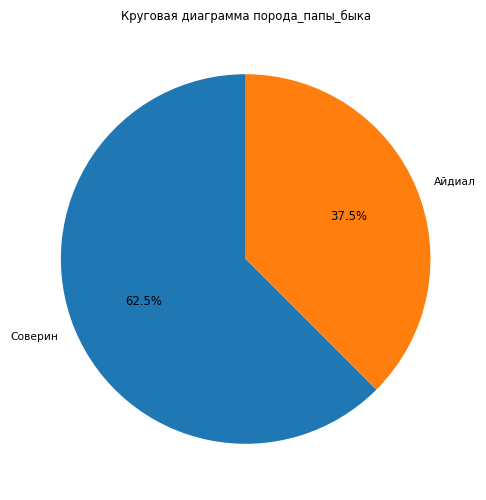

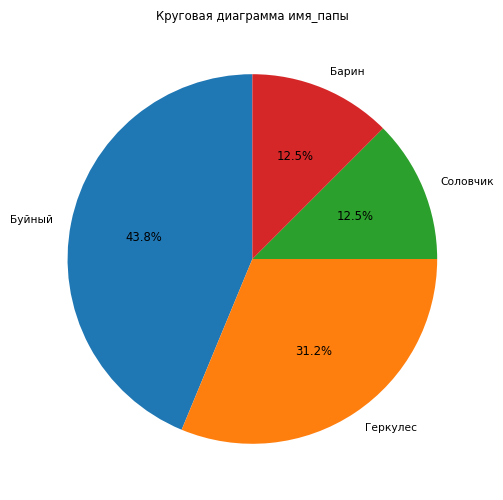

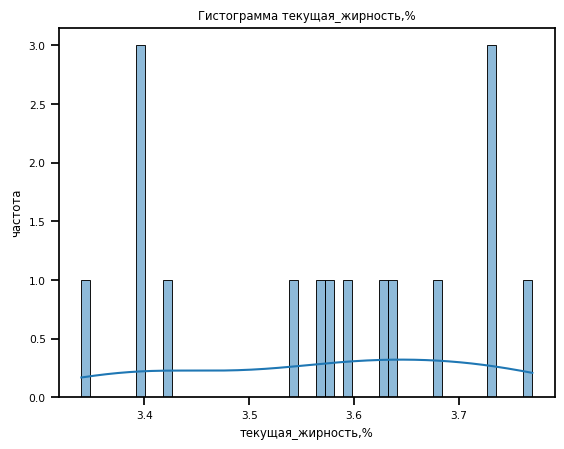

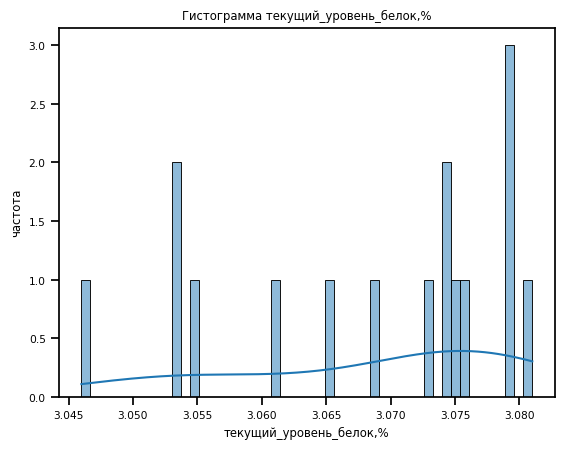

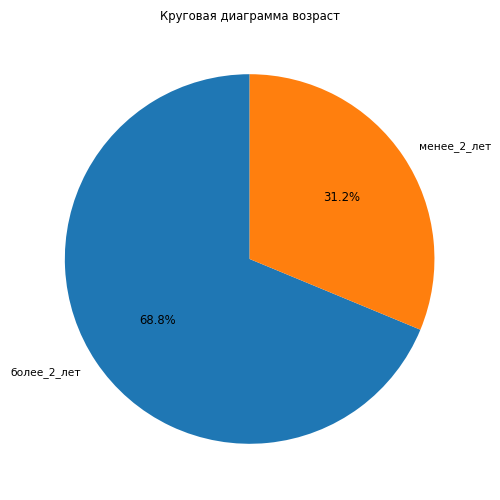

In [35]:
sns.pairplot(data=cow_buy, )  
sns.set_context("notebook", font_scale=0.7)
plt.gcf().set_size_inches(12,12);
plt.show;
plot_builder(cow_buy);

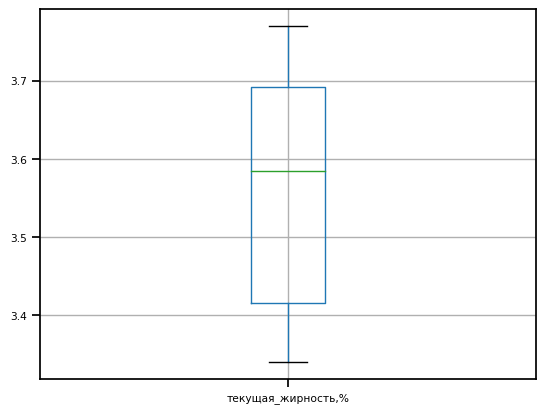

In [36]:
cow_buy.boxplot('текущая_жирность,%');

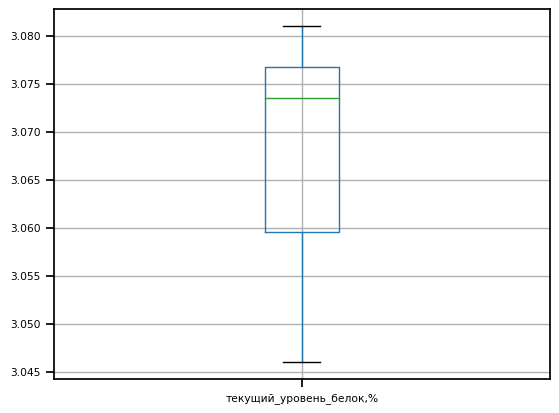

In [37]:
cow_buy.boxplot('текущий_уровень_белок,%');

Данные выглядят нормально, удалять ничего не нужно.

**Вывод: Проведен анализ данных. В тех местах, где были выявлены выбросы, данные были очищены от них.**

## Шаг 4. Проведите корреляционный анализ признаков в датасете ferma_main.csv

In [38]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   удой,_кг                               628 non-null    int64  
 1   эке_(энергетическая_кормовая_единица)  628 non-null    float64
 2   сырой_протеин,_г                       628 non-null    int64  
 3   спо_(сахаро-протеиновое_соотношение)   628 non-null    float64
 4   порода                                 628 non-null    object 
 5   тип_пастбища                           628 non-null    object 
 6   порода_папы_быка                       628 non-null    object 
 7   жирность,%                             628 non-null    float64
 8   белок,%                                628 non-null    float64
 9   вкус_молока                            628 non-null    object 
 10  возраст                                628 non-null    object 
dtypes: flo

<Figure size 1000x800 with 0 Axes>

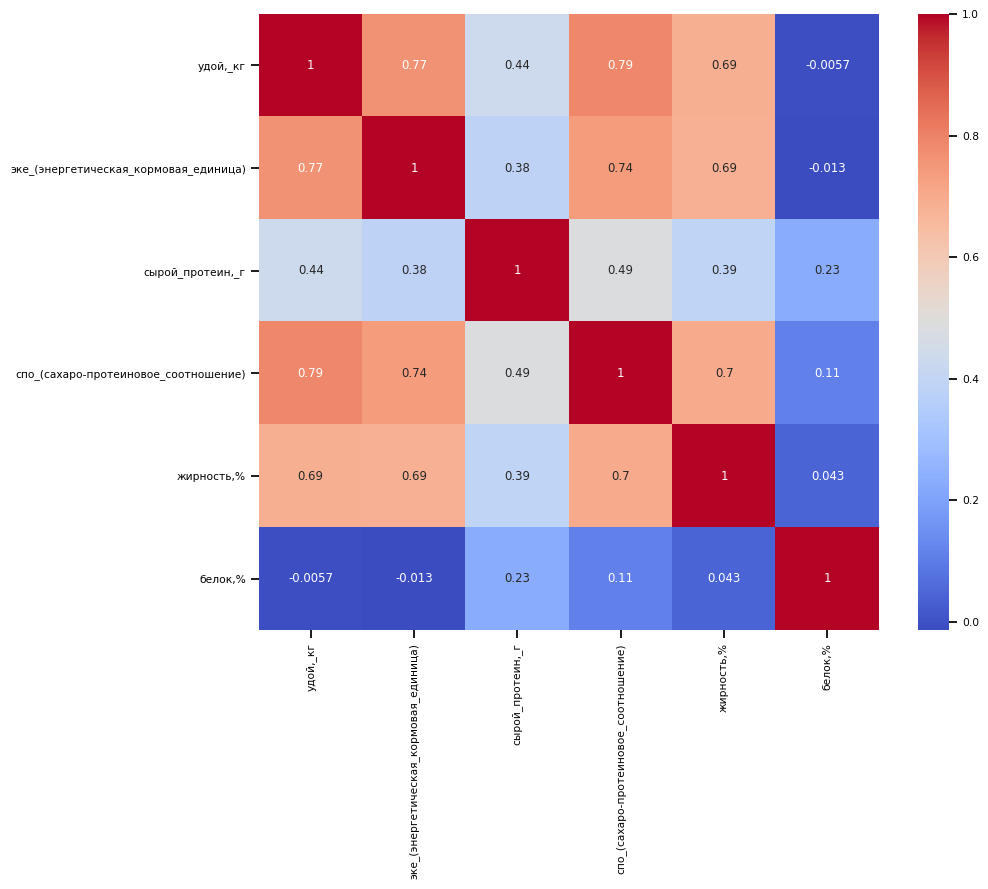

In [39]:
plt.figure(figsize=(10, 8))
def plot_heatmap(df):
    numeric_columns = df.select_dtypes(include=['int64', 'float64']) 
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_columns.corr(method='spearman'), annot=True, cmap='coolwarm')

plot_heatmap(ferma_main)

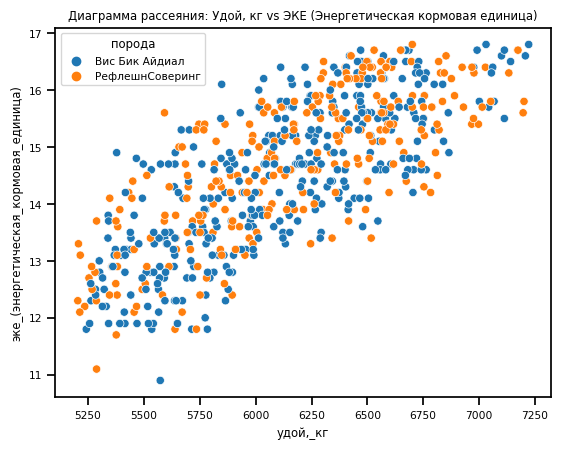

In [40]:
plt.title("Диаграмма рассеяния: Удой, кг vs ЭКЕ (Энергетическая кормовая единица)")
sns.scatterplot(data=ferma_main, x="удой,_кг", y="эке_(энергетическая_кормовая_единица)", hue="порода");

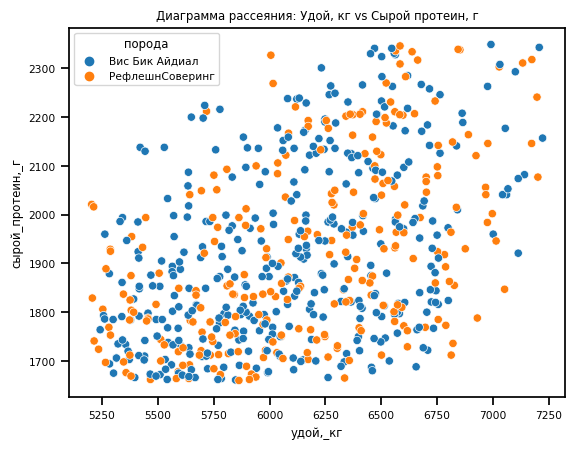

In [41]:
plt.title("Диаграмма рассеяния: Удой, кг vs Сырой протеин, г")
sns.scatterplot(data=ferma_main, x="удой,_кг", y="сырой_протеин,_г", hue="порода");


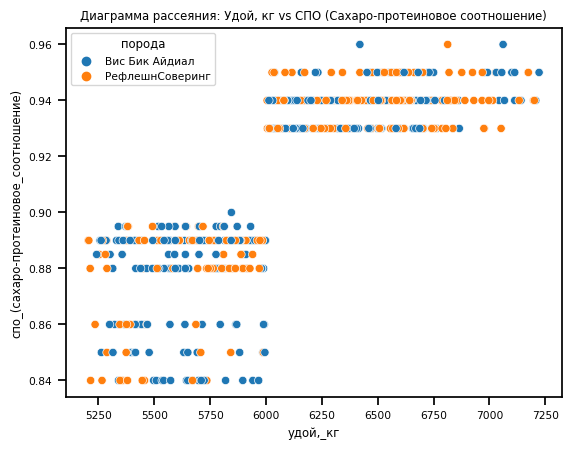

In [42]:
plt.title("Диаграмма рассеяния: Удой, кг vs СПО (Сахаро-протеиновое соотношение)")
sns.scatterplot(data=ferma_main, x="удой,_кг", y="спо_(сахаро-протеиновое_соотношение)", hue="порода");

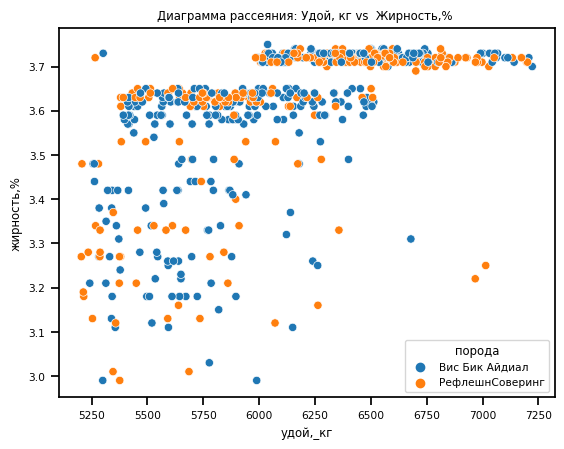

In [43]:
plt.title("Диаграмма рассеяния: Удой, кг vs  Жирность,% ")
sns.scatterplot(data=ferma_main, x="удой,_кг", y="жирность,%", hue="порода");

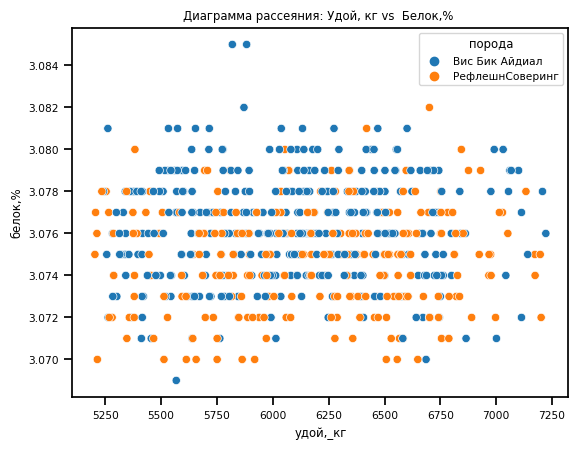

In [44]:
plt.title("Диаграмма рассеяния: Удой, кг vs  Белок,% ")
sns.scatterplot(data=ferma_main, x="удой,_кг", y="белок,%", hue="порода");


На графиках показана нелинейная связь.

**Вывод: По графикам мы поняли, что между целевым и входными признаками наблюдалась линейная и нелинейная связь. Мультиколлениарность не наблюдается.**

## Шаг 5. Задача регрессии

#### Обучение модели.

In [45]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   удой,_кг                               628 non-null    int64  
 1   эке_(энергетическая_кормовая_единица)  628 non-null    float64
 2   сырой_протеин,_г                       628 non-null    int64  
 3   спо_(сахаро-протеиновое_соотношение)   628 non-null    float64
 4   порода                                 628 non-null    object 
 5   тип_пастбища                           628 non-null    object 
 6   порода_папы_быка                       628 non-null    object 
 7   жирность,%                             628 non-null    float64
 8   белок,%                                628 non-null    float64
 9   вкус_молока                            628 non-null    object 
 10  возраст                                628 non-null    object 
dtypes: flo

In [46]:
ferma_main_linear=ferma_main.drop(columns=['жирность,%', 'белок,%', 'вкус_молока' ])
ferma_main_linear.head(10)

,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,возраст
0,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет
1,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет
2,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,более_2_лет
3,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет
4,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет
5,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,менее_2_лет
6,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинное,Соверин,более_2_лет
7,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет
8,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет
9,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,менее_2_лет


In [47]:
def linear_regression_learn(df,target):
        RANDOM_STATE = 42

        X = df.drop([target], axis=1)
        y = df[target]
    
        X_train, X_test, y_train, y_test = train_test_split(
                X, 
                y, 
                random_state=RANDOM_STATE
        )
        
        cat_col_names = df.select_dtypes('object').columns.tolist()
        num_col_names = df.select_dtypes('number').columns.tolist()
        num_col_names.remove(target)
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train[num_col_names])
        X_test_scaled = scaler.transform(X_test[num_col_names])

        encoder = OneHotEncoder(drop='first',sparse=False)
        X_train_ohe =  encoder.fit_transform(X_train[cat_col_names])
        X_test_ohe =  encoder.transform(X_test[cat_col_names])
        encoder_col_names = encoder.get_feature_names()

        X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
        X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

        X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

        X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
        X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)  
        
        model_lr = LinearRegression()
        model_lr.fit(X_train, y_train)
        predictions =  model_lr.predict(X_test)
        
        return X_train, X_test, y_train, y_test, predictions, model_lr, cat_col_names, num_col_names, scaler, encoder



In [48]:
(X_train, X_test, y_train, y_test, predictions,
 model_lr, cat_col_names, num_col_names, scaler, encoder) = linear_regression_learn(ferma_main_linear,'удой,_кг')

mae1 = mean_absolute_error(y_test, predictions)
mse1 = mean_squared_error(y_test, predictions)
rmse1 = mean_squared_error(y_test, predictions, squared=False)
r2_1 = r2_score(y_test, predictions) 

print(predictions[0],  y_test.reset_index(drop=True)[0])
print(mae1)
print(mse1)
print(rmse1)
print(r2_1)
print(cat_col_names)
print(num_col_names)

6031.538080695899 5980
164.2419446347494
43887.01500966054
209.4922791170609
0.7844078173416966
['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
['эке_(энергетическая_кормовая_единица)', 'сырой_протеин,_г', 'спо_(сахаро-протеиновое_соотношение)']


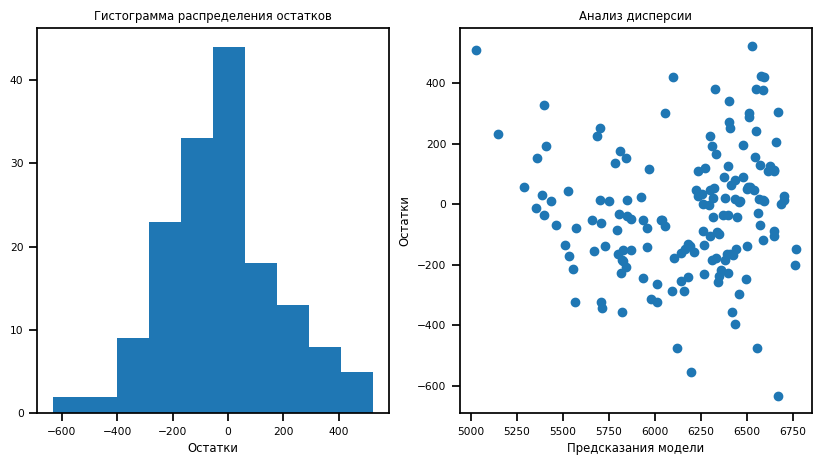

In [49]:
residuals = y_test - predictions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x=residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Вывод: Судя по выбросу у остатков, нужно добавить дополнительные признаки, либо улучшить входные данные. Тем более разброс остатков непостоянен. Такая модель не подойдет для работы.**

#### Обучение модели с учетом связи входных признаков.

In [50]:
ferma_main_linear['спо_(сахаро-протеиновое_соотношение)'].unique()

array([0.89 , 0.885, 0.93 , 0.94 , 0.895, 0.95 , 0.96 , 0.85 , 0.84 ,
       0.86 , 0.88 , 0.9  ])

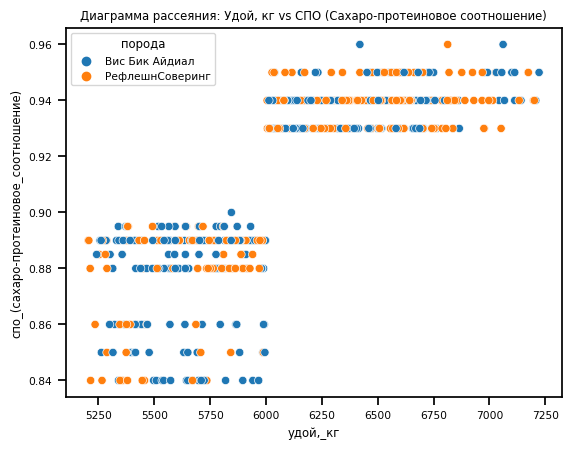

In [51]:
plt.title("Диаграмма рассеяния: Удой, кг vs СПО (Сахаро-протеиновое соотношение)")
sns.scatterplot(data=ferma_main_linear, x="удой,_кг", y="спо_(сахаро-протеиновое_соотношение)", hue="порода");

Судя по диаграмме, граница между кластерами находится на уровне 0.91.

In [52]:
ferma_main_linear['спо_бинарный'] = (ferma_main_linear['спо_(сахаро-протеиновое_соотношение)'] > 0.91).astype(int)
ferma_main_linear['спо_бинарный']

0      0
1      0
2      0
3      0
4      0
      ..
624    1
625    0
626    0
627    0
628    1
Name: спо_бинарный, Length: 628, dtype: int32

In [53]:
ferma_main_linear['эке_квадрат'] = ferma_main_linear['эке_(энергетическая_кормовая_единица)'] ** 2
ferma_main_linear['эке_квадрат']

0      201.64
1      163.84
2      196.00
3      153.76
4      163.84
        ...  
624    237.16
625    166.41
626    207.36
627    190.44
628    262.44
Name: эке_квадрат, Length: 628, dtype: float64

In [54]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   удой,_кг                               628 non-null    int64  
 1   эке_(энергетическая_кормовая_единица)  628 non-null    float64
 2   сырой_протеин,_г                       628 non-null    int64  
 3   спо_(сахаро-протеиновое_соотношение)   628 non-null    float64
 4   порода                                 628 non-null    object 
 5   тип_пастбища                           628 non-null    object 
 6   порода_папы_быка                       628 non-null    object 
 7   жирность,%                             628 non-null    float64
 8   белок,%                                628 non-null    float64
 9   вкус_молока                            628 non-null    object 
 10  возраст                                628 non-null    object 
dtypes: flo

Проводим обучение с новыми признаками:

In [55]:
(X_train, X_test, y_train, y_test, predictions,
 model_lr, cat_col_names, num_col_names, scaler, encoder) = linear_regression_learn(ferma_main_linear,'удой,_кг')

mae2 = mean_absolute_error(y_test, predictions)
mse2 = mean_squared_error(y_test, predictions)
rmse2 = mean_squared_error(y_test, predictions, squared=False)
r2_2 = r2_score(y_test, predictions) 

print(predictions[0],  y_test.reset_index(drop=True)[0])
print(mae2)
print(mse2)
print(rmse2)
print(r2_2)
print(cat_col_names)
print(num_col_names)

5922.398685141877 5980
151.04156376162894
37152.07827157585
192.74874389104548
0.8174927676649222
['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
['эке_(энергетическая_кормовая_единица)', 'сырой_протеин,_г', 'спо_(сахаро-протеиновое_соотношение)', 'спо_бинарный', 'эке_квадрат']


**Вывод. Судя по метрике r2, точность модели улучшилась.**

#### Обучение модели с добавлением признака

In [56]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   имя_папы  629 non-null    object
dtypes: object(1)
memory usage: 5.0+ KB


In [57]:
ferma_main_linear = ferma_main_linear.merge(ferma_dad[['имя_папы']], left_index=True, right_index=True)
ferma_main_linear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   удой,_кг                               628 non-null    int64  
 1   эке_(энергетическая_кормовая_единица)  628 non-null    float64
 2   сырой_протеин,_г                       628 non-null    int64  
 3   спо_(сахаро-протеиновое_соотношение)   628 non-null    float64
 4   порода                                 628 non-null    object 
 5   тип_пастбища                           628 non-null    object 
 6   порода_папы_быка                       628 non-null    object 
 7   возраст                                628 non-null    object 
 8   спо_бинарный                           628 non-null    int32  
 9   эке_квадрат                            628 non-null    float64
 10  имя_папы                               628 non-null    object 
dtypes: flo

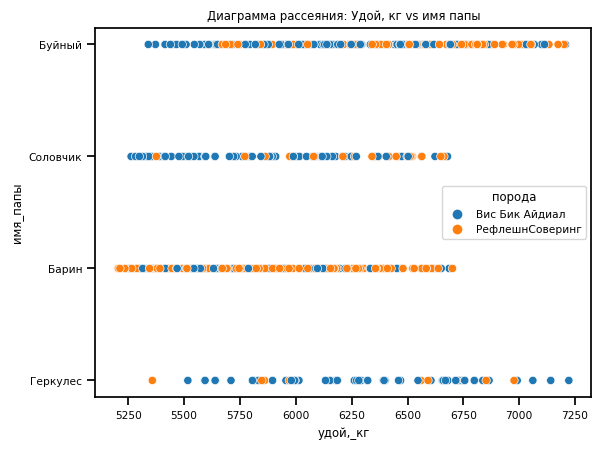

In [58]:
plt.title("Диаграмма рассеяния: Удой, кг vs имя папы")
sns.scatterplot(data=ferma_main_linear, x="удой,_кг", y="имя_папы", hue="порода");

In [59]:
(X_train, X_test, y_train, y_test, predictions,
 model_lr, cat_col_names, num_col_names, scaler, encoder) = linear_regression_learn(ferma_main_linear,'удой,_кг')

mae3 = mean_absolute_error(y_test, predictions)
mse3 = mean_squared_error(y_test, predictions)
rmse3 = mean_squared_error(y_test, predictions, squared=False)
r2_3 = r2_score(y_test, predictions) 

print(predictions[0],  y_test.reset_index(drop=True)[0])
print(mae3)
print(mse3)
print(rmse3)
print(r2_3)
print(cat_col_names)
print(num_col_names)

5985.456896531392 5980
145.5501484803991
34479.49876659781
185.68656054383098
0.8306216452766537
['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
['эке_(энергетическая_кормовая_единица)', 'сырой_протеин,_г', 'спо_(сахаро-протеиновое_соотношение)', 'спо_бинарный', 'эке_квадрат']


In [60]:
print(r2_1, r2_2, r2_3)

0.7844078173416966 0.8174927676649222 0.8306216452766537


Судя по изменению, с добавлением признаков модель только улучшала свою точность

In [61]:
print(mae1, mae2, mae3)

164.2419446347494 151.04156376162894 145.5501484803991


Ошибка уменьшалась.

In [62]:
print(mse1, mse2, mse3)

43887.01500966054 37152.07827157585 34479.49876659781


In [63]:
print(rmse1, rmse2, rmse3)

209.4922791170609 192.74874389104548 185.68656054383098


In [64]:
confidence_interval = np.percentile(predictions, [2.5, 97.5])
confidence_interval

array([5382.95226039, 6768.5921135 ])

In [65]:
ferma_main_finish = ferma_main_linear
cow_buy_finish = cow_buy
cow_buy_finish['эке_(энергетическая_кормовая_единица)'] = ferma_main_linear['эке_(энергетическая_кормовая_единица)'].mean() * 1.05
cow_buy_finish['сырой_протеин,_г'] = ferma_main_linear['сырой_протеин,_г'].mean() * 1.05
cow_buy_finish['спо_(сахаро-протеиновое_соотношение)'] = ferma_main_linear['спо_(сахаро-протеиновое_соотношение)'].mean() * 1.05
ferma_main_finish['тип_пастбища'] = ferma_main_finish['тип_пастбища'].str.lower()
cow_buy_finish = cow_buy_finish.drop(columns=['текущая_жирность,%','текущий_уровень_белок,%' ])

cow_buy_finish['спо_бинарный'] = (cow_buy_finish['спо_(сахаро-протеиновое_соотношение)'] > 0.91).astype(int)
cow_buy_finish['эке_квадрат'] = cow_buy_finish['эке_(энергетическая_кормовая_единица)'] ** 2

cow_buy_finish = cow_buy_finish.drop(columns=['имя_папы'])
cow_buy_finish = cow_buy_finish.merge(ferma_dad[['имя_папы']], left_index=True, right_index=True)

In [66]:
ferma_main_finish.head(20)

,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,возраст,спо_бинарный,эке_квадрат,имя_папы
0,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,0,201.64,Буйный
1,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,менее_2_лет,0,163.84,Соловчик
2,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,более_2_лет,0,196.00,Барин
3,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,более_2_лет,0,153.76,Буйный
4,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,менее_2_лет,0,163.84,Барин
5,5254,12.7,1806,0.885,РефлешнСоверинг,холмистое,Соверин,менее_2_лет,0,161.29,Барин
6,5910,13.2,1792,0.885,Вис Бик Айдиал,равнинное,Соверин,более_2_лет,0,174.24,Соловчик
7,6179,14.7,1806,0.930,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,1,216.09,Геркулес
8,6783,14.2,1918,0.940,РефлешнСоверинг,холмистое,Айдиал,более_2_лет,1,201.64,Буйный
9,5339,13.4,1791,0.895,Вис Бик Айдиал,холмистое,Соверин,менее_2_лет,0,179.56,Барин


In [67]:
cow_buy_finish.head(20)

,порода,тип_пастбища,порода_папы_быка,возраст,эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),спо_бинарный,эке_квадрат,имя_папы
0,Вис Бик Айдиал,холмистое,Айдиал,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,Буйный
1,Вис Бик Айдиал,равнинное,Соверин,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138,Соловчик
2,РефлешнСоверинг,равнинное,Соверин,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,Барин
3,РефлешнСоверинг,холмистое,Айдиал,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,Буйный
4,РефлешнСоверинг,равнинное,Айдиал,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,Барин
5,РефлешнСоверинг,равнинное,Соверин,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138,Барин
7,Вис Бик Айдиал,равнинное,Соверин,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,Геркулес
9,РефлешнСоверинг,холмистое,Айдиал,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138,Барин
10,Вис Бик Айдиал,холмистое,Соверин,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,Буйный
11,РефлешнСоверинг,равнинное,Соверин,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,Соловчик


In [68]:
print(ferma_main_finish.info())
print(cow_buy_finish.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   удой,_кг                               628 non-null    int64  
 1   эке_(энергетическая_кормовая_единица)  628 non-null    float64
 2   сырой_протеин,_г                       628 non-null    int64  
 3   спо_(сахаро-протеиновое_соотношение)   628 non-null    float64
 4   порода                                 628 non-null    object 
 5   тип_пастбища                           628 non-null    object 
 6   порода_папы_быка                       628 non-null    object 
 7   возраст                                628 non-null    object 
 8   спо_бинарный                           628 non-null    int32  
 9   эке_квадрат                            628 non-null    float64
 10  имя_папы                               628 non-null    object 
dtypes: flo

In [69]:
print(ferma_main_finish['имя_папы'].unique())
print(cow_buy_finish['имя_папы'].unique())

['Буйный' 'Соловчик' 'Барин' 'Геркулес']
['Буйный' 'Соловчик' 'Барин' 'Геркулес']


In [70]:
print(ferma_main_finish.shape)
print(cow_buy_finish.shape)

(628, 11)
(16, 10)


In [71]:
(X_train, X_test, y_train, y_test, predictions,
 model_lr, cat_col_names, num_col_names, scaler, encoder) = linear_regression_learn(ferma_main_finish, 'удой,_кг')

X_new = cow_buy_finish

cat_col_names = cow_buy_finish.select_dtypes('object').columns.tolist()
num_col_names = cow_buy_finish.select_dtypes('number').columns.tolist()
print(cat_col_names)
print(num_col_names)
print(ferma_main_finish['имя_папы'].unique())
print(cow_buy_finish['имя_папы'].unique())

X_test_scaled = scaler.transform(X_new[num_col_names])

X_test_ohe =  encoder.transform(X_new[cat_col_names])
encoder_col_names = encoder.get_feature_names()

X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_test_lin = pd.concat([X_test_ohe, X_test_scaled], axis=1) 
print(X_train.shape)
print(X_test_lin.shape)



model_lr.fit(X_train, y_train)
new_predictions = model_lr.predict(X_test_lin)

print(new_predictions)


['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
['эке_(энергетическая_кормовая_единица)', 'сырой_протеин,_г', 'спо_(сахаро-протеиновое_соотношение)', 'спо_бинарный', 'эке_квадрат']
['Буйный' 'Соловчик' 'Барин' 'Геркулес']
['Буйный' 'Соловчик' 'Барин' 'Геркулес']
(471, 12)
(16, 12)
[6584.94779588 6066.19884432 6280.44967952 6595.57226347 6250.10691331
 6048.6151937  6585.55002696 6068.84666343 6615.29056208 6308.65779772
 6290.05668166 6383.45607626 6595.57226347 6615.29056208 6343.50630791
 6298.03333013]


**Вывод. После обработки датасетов получили прогноз удоя коров.**

## Шаг 6. Задача классификации

Снова создадим функцию для удобства обучения модели:

In [72]:
def logistic_regression_learn(df, target):
    RANDOM_STATE = 42

    X = df.drop([target], axis=1)
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(
                X, 
                y, 
                random_state=RANDOM_STATE
    )
        
    cat_col_names = df.select_dtypes('object').columns.tolist()
    num_col_names = df.select_dtypes('number').columns.tolist()
    cat_col_names.remove(target)
        
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])

    encoder = OneHotEncoder(drop='first',sparse=False)
    X_train_ohe =  encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe =  encoder.transform(X_test[cat_col_names])
    encoder_col_names = encoder.get_feature_names()

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1) 
    
    clf = LogisticRegression()
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    return X_train, X_test, y_train, y_test, y_pred, clf, scaler, encoder

In [73]:
ferma_main_logistic = ferma_main.drop(columns=['спо_(сахаро-протеиновое_соотношение)', 'эке_(энергетическая_кормовая_единица)', 'удой,_кг', 'сырой_протеин,_г' ])
ferma_main_logistic = ferma_main_logistic.merge(ferma_dad[['имя_папы']], left_index=True, right_index=True)

In [74]:
X_train, X_test, y_train, y_test, y_pred, clf, scaler, encoder = logistic_regression_learn(ferma_main_logistic, 'вкус_молока')

acc = accuracy_score(y_test, y_pred)
print(acc)
y_pred[y_pred == 'вкусно'] = 1
y_pred[y_pred == 'не вкусно'] = 0
y_pred = y_pred.astype(int)
y_pred

0.5796178343949044


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0])

In [75]:
y_test_num = y_test.replace({'вкусно': 1, 'не вкусно': 0})
y_test_num

582    1
592    1
551    1
214    0
486    1
      ..
84     1
285    1
577    1
80     0
24     0
Name: вкус_молока, Length: 157, dtype: int64

[[17 52]
 [14 74]]


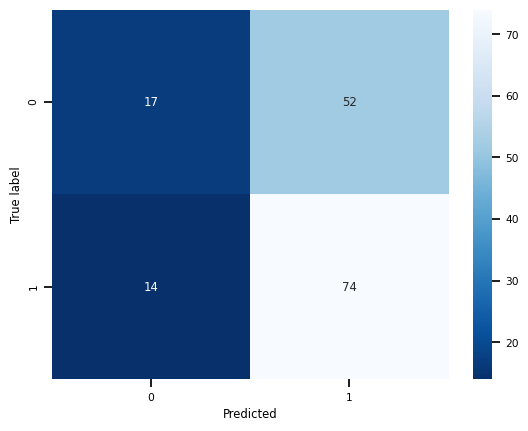

In [76]:
cm = confusion_matrix(y_test_num, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 
print(cm)

In [77]:
recall = recall_score(y_test_num, y_pred, pos_label=1)
precision = precision_score(y_test_num, y_pred, pos_label=1)
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

recall:  0.841
precision:  0.587


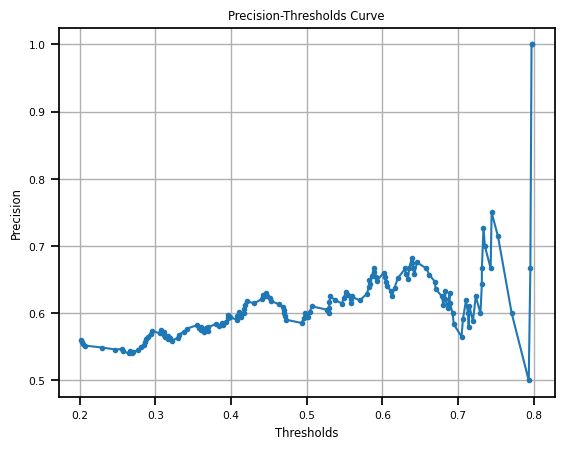

[0.20215327 0.20304374 0.20456602 0.20675113 0.22926399 0.24731956
 0.2557661  0.25706232 0.26467925 0.2665091  0.26868608 0.27053345
 0.27669741 0.28046817 0.2852445  0.28603379 0.28697371 0.28965414
 0.29369807 0.29547897 0.30563874 0.3073694  0.31091915 0.3113782
 0.31339331 0.3169808  0.31700791 0.31965722 0.32145596 0.32975861
 0.33072492 0.33811023 0.34190985 0.3544333  0.35782724 0.35965821
 0.36045053 0.36089898 0.36478453 0.36627518 0.36944959 0.36978762
 0.37967606 0.38384213 0.3878792  0.38880405 0.39351154 0.39583333
 0.39616562 0.39841197 0.40732393 0.40830116 0.41059984 0.41131567
 0.41361945 0.41656372 0.4172987  0.41791806 0.42045279 0.43005776
 0.44060228 0.44169944 0.44214714 0.44588656 0.44755012 0.45141276
 0.4533091  0.46271973 0.46893829 0.47018471 0.4702687  0.47087773
 0.47302497 0.4936029  0.49571918 0.49806441 0.50193559 0.50428082
 0.5063971  0.52697503 0.52912227 0.5297313  0.52981529 0.53106171
 0.53728027 0.5466909  0.54858724 0.55244988 0.55411344 0.55785

In [78]:
probs = clf.predict_proba(X_test)
probs_arr = probs.flatten()
precision, recall, thresholds = precision_recall_curve(y_test_num, probs_arr[:157])

plt.plot(thresholds, precision[:-1], marker='.')
plt.xlabel('Thresholds')
plt.ylabel('Precision')
plt.title('Precision-Thresholds Curve')
plt.grid(True)
plt.show()
print(thresholds)

Предварительные выводы:
1.  Критическими являются как ошибки первого рода (false positives). False positives могут привести к неверному отбору коров, что имеет финансовые последствия, особенно в контексте потери времени и ресурсов на неверные инвестиции.
2. в вопросе порога я выбрал 0.6. Значения метрик упали, модель стала предсказывать лучше и точнее, но упустила много положительных случаев.

Думаю стоит оставить стандартый порог 0.6. При низком пороге много ошибок, при высоком теряем много значений.

In [79]:

cow_buy_finish2 = cow_buy
ferma_main_logistic['тип_пастбища'] = ferma_main_logistic['тип_пастбища'].str.lower()
cow_buy_finish2 = cow_buy_finish2.drop(columns=['спо_(сахаро-протеиновое_соотношение)', 'эке_(энергетическая_кормовая_единица)','сырой_протеин,_г' ])


In [80]:
print(ferma_main_logistic.head(10))

            порода тип_пастбища порода_папы_быка  жирность,%  белок,%  \
0   Вис Бик Айдиал    равнинное           Айдиал        3.58    3.076   
1   Вис Бик Айдиал    равнинное          Соверин        3.54    3.079   
2  РефлешнСоверинг    холмистое          Соверин        3.59    3.074   
3  РефлешнСоверинг    холмистое           Айдиал        3.40    3.075   
4   Вис Бик Айдиал    равнинное          Соверин        3.73    3.073   
5  РефлешнСоверинг    холмистое          Соверин        3.13    3.078   
6   Вис Бик Айдиал    равнинное          Соверин        3.48    3.077   
7   Вис Бик Айдиал    равнинное           Айдиал        3.55    3.076   
8  РефлешнСоверинг    холмистое           Айдиал        3.71    3.077   
9   Вис Бик Айдиал    холмистое          Соверин        3.13    3.075   

  вкус_молока      возраст  имя_папы  
0      вкусно  более_2_лет    Буйный  
1      вкусно  менее_2_лет  Соловчик  
2   не вкусно  более_2_лет     Барин  
3   не вкусно  более_2_лет    Буйный  
4

In [81]:
print(cow_buy_finish2.head(10))

             порода тип_пастбища порода_папы_быка  имя_папы  \
0    Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1    Вис Бик Айдиал    равнинное          Соверин    Буйный   
2   РефлешнСоверинг    равнинное          Соверин     Барин   
3   РефлешнСоверинг    холмистое           Айдиал    Буйный   
4   РефлешнСоверинг    равнинное           Айдиал    Буйный   
5   РефлешнСоверинг    равнинное          Соверин  Геркулес   
7    Вис Бик Айдиал    равнинное          Соверин    Буйный   
9   РефлешнСоверинг    холмистое           Айдиал    Буйный   
10   Вис Бик Айдиал    холмистое          Соверин  Соловчик   
11  РефлешнСоверинг    равнинное          Соверин  Геркулес   

    текущая_жирность,%  текущий_уровень_белок,%      возраст  
0                 3.58                    3.076  более_2_лет  
1                 3.54                    3.081  менее_2_лет  
2                 3.59                    3.074  более_2_лет  
3                 3.40                    3.061  более

In [82]:
print(ferma_main_logistic.shape)
print(cow_buy_finish2.shape)

(628, 8)
(16, 7)


In [83]:
X_train, X_test, y_train, y_test, y_pred, clf, scaler, encoder = logistic_regression_learn(ferma_main_logistic, 'вкус_молока')

X_new2 = cow_buy_finish2

cat_col_names = cow_buy_finish2.select_dtypes('object').columns.tolist()
num_col_names = cow_buy_finish2.select_dtypes('number').columns.tolist()

X_test_scaled2 = scaler.transform(X_new2[num_col_names])

encoder.fit(X_new2[cat_col_names])
X_test_ohe2 =  encoder.transform(X_new2[cat_col_names])
encoder_col_names = encoder.get_feature_names()

X_test_ohe2 = pd.DataFrame(X_test_ohe2, columns=encoder_col_names)
X_test_scaled2 = pd.DataFrame(X_test_scaled2, columns=num_col_names)

X_test_log = pd.concat([X_test_ohe2, X_test_scaled2], axis=1) 
print(X_train.shape)
print(X_test_log.shape)



clf.fit(X_train, y_train)
predictions_log = clf.predict(X_test_log)

print(predictions_log)

probs2 = clf.predict_proba(X_test_log)[:, 1]
predictions_threshold = (probs2 >= 0.6).astype(int)

print(predictions_threshold)


(471, 9)
(16, 9)
['вкусно' 'вкусно' 'вкусно' 'не вкусно' 'не вкусно' 'не вкусно' 'вкусно'
 'вкусно' 'не вкусно' 'не вкусно' 'не вкусно' 'вкусно' 'не вкусно'
 'вкусно' 'не вкусно' 'не вкусно']
[0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1]


**Вывод. В данном шаге сделали предсказание удоя и вкусность молока. В процессе улучшали модели.**

## Шаг 7. Сделайте итоговые выводы

Соединим предсказания с датасетом:

In [84]:
cow_buy['вкус_молока'] = predictions_log
cow_buy['удой_кг'] = new_predictions
cow_buy.head(5)

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),вкус_молока,удой_кг
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,вкусно,6584.947796
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,вкусно,6066.198844
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,вкусно,6280.449680
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,не вкусно,6595.572263
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,не вкусно,6250.106913


Отберем самые коров с удоем свыше 6000кг и вкусным молоком:

In [85]:
best_cows = cow_buy[cow_buy.apply(lambda x: x['удой_кг'] > 6000 and x['вкус_молока'] == 'вкусно', axis=1)]
best_cows

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),вкус_молока,удой_кг
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,вкусно,6584.947796
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,вкусно,6066.198844
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,вкусно,6280.449680
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744,вкусно,6585.550027
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,вкусно,6068.846663
13,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,15.276162,2019.947532,0.958744,вкусно,6383.456076
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,0.958744,вкусно,6615.290562


С учетом требований фермера можно купить только 7 коров из 16. Думаю, если требования понизить немного, можно выбрать больше коров с вкусным молоком. Судя по датасету можно сказать, что нужно выбирать коров старше 2 лет.

In [86]:
best_cows = cow_buy[cow_buy.apply(lambda x: x['удой_кг'] > 5800 and x['вкус_молока'] == 'вкусно', axis=1)]
best_cows

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),вкус_молока,удой_кг
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,вкусно,6584.947796
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,вкусно,6066.198844
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,вкусно,6280.449680
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744,вкусно,6585.550027
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,вкусно,6068.846663
13,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,15.276162,2019.947532,0.958744,вкусно,6383.456076
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,0.958744,вкусно,6615.290562


Уже 8 коров.

В тоже время можно выбрать самх удойных коров, если потребуется.

In [88]:
best_cows = cow_buy[cow_buy.apply(lambda x: x['удой_кг'] > 6300, axis=1)]
best_cows

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),вкус_молока,удой_кг
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,вкусно,6584.947796
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,не вкусно,6595.572263
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744,вкусно,6585.550027
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.276162,2019.947532,0.958744,не вкусно,6615.290562
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.276162,2019.947532,0.958744,не вкусно,6308.657798
13,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,15.276162,2019.947532,0.958744,вкусно,6383.456076
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.276162,2019.947532,0.958744,не вкусно,6595.572263
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,0.958744,вкусно,6615.290562
17,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,15.276162,2019.947532,0.958744,не вкусно,6343.506308


**Вывод.**
1. Я устронял неллинейность между признаками. Сначала спо переводил в бинарное исчисление, затем эко возвел в квадрат.
2. Вероятно можно устранить устранить остальные неллинейности между признаками, тем самым модель улучшится.
3. Здесь скорее важен баланс: Если модель часто ошибается, и для заказчика важна именно точность определения вкусности, то нужно уделять внимание Accuracy. В тоже время если важно не упустить всех коров с вкусным молоком, то здесь важен Recall.